# Problem statements:
- Find the actionable insights on how to increase the charges of the insurance premium for the company.
- Perform Missing value treatment.
- Perform Standardization of the numerical columns.
- Perform Data Encoding on the Categorical columns.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('medical-charges.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

## Observations:
- There are 1338 rows and 7 columns in the dataset.
- Each row consist the information of the individual patients.

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset.

In [5]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dict1 = {
    'female':1,
    'male':0
}
dict2 = {
    'yes':1,
    'no':0
}
print(dict1,dict2)

{'female': 1, 'male': 0} {'yes': 1, 'no': 0}


In [8]:
data['sex'] = data['sex'].replace(dict1)
data['smoker']=data['smoker'].replace(dict2)

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


<AxesSubplot:>

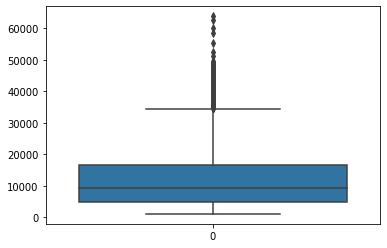

In [10]:
# checking for outliers
sns.boxplot(data['charges'])

In [11]:
median_=data['charges'].median()
median_

9382.033

In [12]:
q3=data['charges'].quantile(0.75)
q1 = data['charges'].quantile(0.25)
iqr=q3-q1
uw = q3+1.5*iqr

In [13]:
data[data['charges']>q3+1.5*iqr]['charges'].count()

139

In [14]:
data['charges'] = np.where(data['charges']>q3,median_,data['charges'])

<AxesSubplot:>

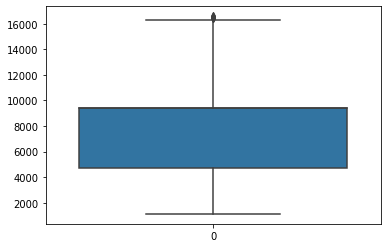

In [15]:
sns.boxplot(data['charges'])

In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,7830.700355
std,14.049960,0.500160,6.098187,1.205493,0.403694,3613.605298
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9379.968850
75%,51.000000,1.000000,34.693750,2.000000,0.000000,9382.033000
max,64.000000,1.000000,53.130000,5.000000,1.000000,16586.497710


In [18]:
data.groupby('region',as_index=False)['charges'].sum()

,region,charges
0,northeast,2.685327e+06
1,northwest,2.542039e+06
2,southeast,2.741458e+06
3,southwest,2.508653e+06


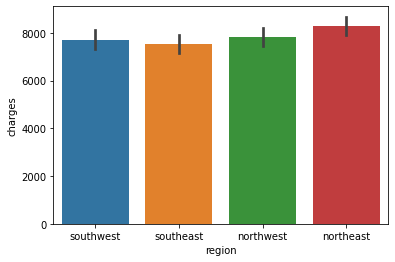

In [19]:
sns.barplot(x='region',y='charges',data=data)
plt.show()

So, from the above we can see that northeast region have the maximum charges.

In [42]:
df = pd.read_csv('medical-charges.csv')


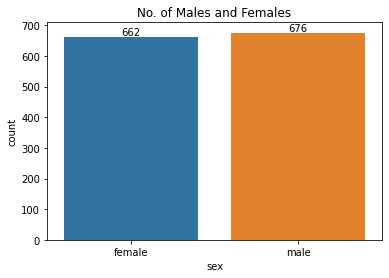

In [60]:
ax=sns.countplot(x='sex',data=df)
ax.bar_label(ax.containers[0])
plt.title("No. of Males and Females")

plt.show()


In [78]:
a = df.groupby(['sex','smoker'])['sex'].count()
a

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: sex, dtype: int64

In [20]:
# Applying Standardization in the numerical columns
standardization_col_ = ['age','bmi']


In [21]:
# import minmaxscaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [22]:
data[standardization_col_] = mms.fit_transform(data[standardization_col_])

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1,0.321227,0,1,southwest,9382.0330
1,0.000000,0,0.479150,1,0,southeast,1725.5523
2,0.217391,0,0.458434,3,0,southeast,4449.4620
3,0.326087,0,0.181464,0,0,northwest,9382.0330
4,0.304348,0,0.347592,0,0,northwest,3866.8552


In [24]:
# Performing one hot encoding on region column
data_ohe = pd.get_dummies(data['region'])
data_ohe

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [25]:
data=pd.concat([data,data_ohe],axis=1)

In [26]:
data.drop('region',axis=1,inplace=True)

In [27]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,1,0.321227,0,1,9382.0330,0,0,0,1
1,0.000000,0,0.479150,1,0,1725.5523,0,0,1,0
2,0.217391,0,0.458434,3,0,4449.4620,0,0,1,0
3,0.326087,0,0.181464,0,0,9382.0330,0,1,0,0
4,0.304348,0,0.347592,0,0,3866.8552,0,1,0,0


# Spliting data into x and y

In [28]:
x = data.drop('charges',axis=1)
y = data['charges']

In [29]:
y

0        9382.0330
1        1725.5523
2        4449.4620
3        9382.0330
4        3866.8552
           ...    
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
1337     9382.0330
Name: charges, Length: 1338, dtype: float64

# Spliting data into train and test dataset.

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

# Applying linear Regression on the dataset

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

# Predicting value on x_test

In [33]:
y_pred = lr.predict(x_test)
y_pred

array([ 6870.20580111,  6697.27638765, 10874.14475512,  9253.72090069,
        4378.16140639, 14342.08968056,  6646.95450553,  8046.99347622,
        5617.39980618, 10553.90154361,  8205.27209651, 10829.23141421,
        7165.16969328,  9846.41336489,  7560.64005001, 10381.18744764,
       10786.87967463,  5611.42229729, 10375.89678327,  4961.1992231 ,
        3281.16082284, 13196.34865372,  5765.40544162,  7131.920882  ,
        5694.52593195,  9616.93695808,  7491.04556306, 11331.54191008,
        2851.32169879,  3458.1212727 , 10336.72602628,  4811.4946806 ,
       11875.67238849,  4077.33527217,  4861.65505298,  4389.8838624 ,
        9046.84524084,  3862.19152429, 11007.53212559, 14489.62222722,
        6958.61510501,  7328.04991155, 11494.32721032, 11196.64689744,
       13244.4739424 , 10814.7320948 , 11068.68129448,  3730.47870762,
       11442.55297788,  8126.6519416 , 12708.25856285,  7549.37631845,
        5621.64065257, 14348.41373968,  8398.86895286, 10760.3819976 ,
      

In [34]:
x_test

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
589,0.434783,1,0.396287,1,0,0,0,1,0
383,0.369565,1,0.736616,2,0,0,0,1,0
534,1.000000,0,0.659672,0,0,0,0,1,0
284,0.739130,1,0.410008,0,0,0,0,0,1
821,0.173913,0,0.046005,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
871,0.173913,1,0.363734,1,0,0,0,1,0
496,0.282609,1,0.205542,2,0,0,0,0,1
578,0.739130,0,0.383105,1,0,0,0,0,1
1012,0.934783,1,0.467312,4,0,0,0,1,0


In [36]:
# value of m
m=lr.coef_
m

array([8223.34132673,  403.25472354,  203.0661381 ,  294.26631801,
       2782.21128235,  528.24585856,   47.72275602, -374.103879  ,
       -201.86473558])

In [37]:
c = lr.intercept_
c

2890.950306957211

In [38]:
# checking accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6796495973518428

In [39]:
# checking error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))


2023.3443033541125

In [40]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,1,0.321227,0,1,9382.0330,0,0,0,1
1,0.000000,0,0.479150,1,0,1725.5523,0,0,1,0
2,0.217391,0,0.458434,3,0,4449.4620,0,0,1,0
3,0.326087,0,0.181464,0,0,9382.0330,0,1,0,0
4,0.304348,0,0.347592,0,0,3866.8552,0,1,0,0
